# Getting the data for each Race/Sex Combination

All the data is non-seasonally adjusted for ages 16+ and any marital status monthly for as varying time periods. Variables will be sex (M/F) and race (Asian, Black or African American, Latino or Hispanic, and White)

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root = '/content/drive/My Drive/STEM Fellowship - Undergrad BDC 2020/Datasets/Unemployment by Sex Race (for #4)/'
Asian_F_raw = pd.read_csv(root + 'Asian Female.csv')
Asian_M_raw = pd.read_csv(root + 'Asian Men.csv')
Hispanic_F_raw = pd.read_csv(root + 'Hispanic or Latino Female.csv')
Hispanic_M_raw = pd.read_csv(root + 'Hispanic or Latino Male.csv')
Black_F_raw = pd.read_csv(root + 'Black or African American Female.csv')
Black_M_raw = pd.read_csv(root + 'Black or African American Male.csv')
White_F_raw = pd.read_csv(root + 'White Female.csv')
White_M_raw = pd.read_csv(root + 'White Male.csv')

In [0]:
# Asian_F_raw = pd.read_csv('Asian Female.csv')
# Asian_M_raw = pd.read_csv('Asian Men.csv')
# Hispanic_F_raw = pd.read_csv('Hispanic or Latino Female.csv')
# Hispanic_M_raw = pd.read_csv('Hispanic or Latino Male.csv')
# Black_F_raw = pd.read_csv('Black or African American Female.csv')
# Black_M_raw = pd.read_csv('Black or African American Male.csv')
# White_F_raw = pd.read_csv('White Female.csv')
# White_M_raw = pd.read_csv('White Male.csv')

In [0]:
# some functions since we wnat to do the same thing for each of the data sets and they are quite similar

# function to change the data frame to two columns (month and percent) where the date-times are in order
# also removes nan values and the header information and converts the dates to date-time
def organize_data(some_raw_data):
  # create a df and two lists
  temporary = pd.DataFrame()
  time_axis = []
  temp_1_col = []

  #remove the information at the top of the data set and rename the columns and index
  temporary = some_raw_data.iloc[13:,:]
  temporary = temporary.rename(columns=some_raw_data.iloc[12,:])
  temporary = temporary.set_index('Year')

  #create a list of all the year/month combos in order rather than using them as a grid
  for i in range(int(temporary.index[0]), int(temporary.index[-1]) + 1, 1):
    for j in range(1,13):
      time_axis.append(f'{i}-{j}-01')

  #convert the list to date time format
  time_axis = pd.to_datetime(time_axis) 

  #change the df from a matrix to a single column
  for i in range(0,temporary.shape[0],1):
    for j in range(0,temporary.shape[1] - 1,1):
        temp_1_col.append(temporary.iat[i,j])

  #various other tweaks
  temp = pd.DataFrame(data = temp_1_col, index = time_axis) #save the single column data as a new data frame
  temp.columns = ['Percent'] # name the column 'Percent
  temp['Months'] = temp.index #create a column called 'Months' based on the index of the data frame
  #temp.index = np.arange(0, temporary.shape[0]*12) #reset the indexes to indicate the row number within the df
  temp = temp.dropna(0) #drop any rows with nan (such as later in 2020 which data does not exist for at this time)
  col = temp.pop('Months') #move the months column from the right side of the df to the very left
  temp.insert(0, col.name, col) 
  temp.Percent = temp.Percent.astype('float') #save the data in the 'Percent' column as float (it was previously string)
  temp.index = np.arange(0, temp.shape[0])

  # ALSO GET YEARLY AVERAGES
  temp_avg = pd.DataFrame(data = some_raw_data.iloc[13:,12])
  return temp, temp_avg

Asian_F, AF_avg = organize_data(Asian_F_raw)
Asian_F.name = 'Asian_F'
Asian_M, AM_avg = organize_data(Asian_M_raw)
Asian_M.name = 'Asian_M'
Hispanic_F, HF_avg = organize_data(Hispanic_F_raw)
Hispanic_F.name = 'Hispanic_F'
Hispanic_M, HM_avg = organize_data(Hispanic_M_raw)
Hispanic_M.name = 'Hispanic_M'
Black_F, BF_avg = organize_data(Black_F_raw)
Black_F.name = 'Black_F'
Black_M, BM_avg = organize_data(Black_M_raw)
Black_M.name = 'Black_M'
White_F, WF_avg= organize_data(White_F_raw)
White_F.name = 'White_F'
White_M, WM_avg = organize_data(White_M_raw)
White_M.name = 'White_M'

In [0]:
# check some stuff
print(Hispanic_F, AF_avg, "\n", Black_M.name)

        Months  Percent
0   1976-06-01     13.5
1   1976-07-01     13.5
2   1976-08-01     13.0
3   1976-09-01     11.7
4   1976-10-01     11.6
..         ...      ...
522 2019-12-01      4.8
523 2020-01-01      5.3
524 2020-02-01      5.5
525 2020-03-01      6.6
526 2020-04-01     20.5

[527 rows x 2 columns]    Unnamed: 12
13         2.8
14         5.8
15         5.6
16         5.5
17         4.3
18         3.2
19         2.4
20         4.0
21         4.5
22         7.7
23         6.9
24         7.0
25         7.1
26         3.6
27         3.6
28         3.8
29         2.9
30         2.2
31         2.7
32         2.7
33         NaN 
 Black_M


# Visualize the 2008 recession on each of these groups

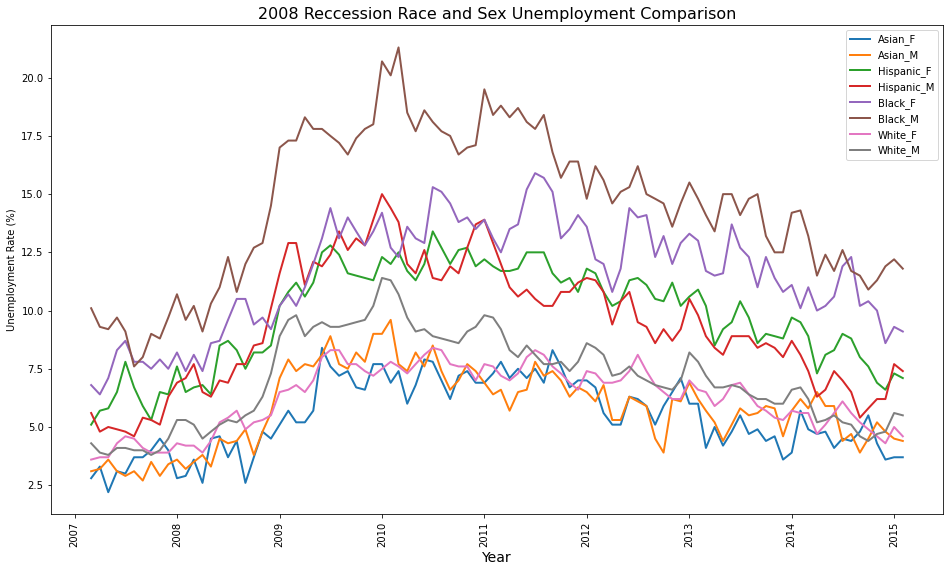

In [0]:
all_combos = [Asian_F, Asian_M, Hispanic_F, Hispanic_M, Black_F, Black_M, White_F, White_M]

fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

for MUR0 in all_combos:
  start_time = MUR0.loc[MUR0.Months == np.datetime64('2007-03-01')].index[0]
  years_of_interest = 8

  # sets the time frame of the plot
  time_frame = years_of_interest*12
  end_time = (start_time + time_frame)
  if end_time > MUR0.shape[0]:
    end_time = MUR0.shape[0]
  else:
    end_time = (start_time + time_frame)

  plt.plot(MUR0.iloc[start_time:end_time,0], MUR0.iloc[start_time:end_time,1], linewidth = '2', label = f'{MUR0.name}') # dont plot the Nan values at the end of 2020 which data doesnt exist for yet.

plt.legend()
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Unemployment Rate (%)')
plt.title('2008 Reccession Race and Sex Unemployment Comparison', fontsize = 16)

plt.show()

I was going to plot the yearly averages but i might not now... i dont want to deal with them... From this data we can see that the populations with the highest unemployment rates are Black or African American males and females, followed by hispanic or latino males and females. Overall unemployment amongst these groups appears to be higher regardless of the recession. However the difference in unemployment rates does get larger during the recession compared to during standard levels of 'economic prosperity'.

# COVID Comparison of Unemployment Rates for Race/Sex

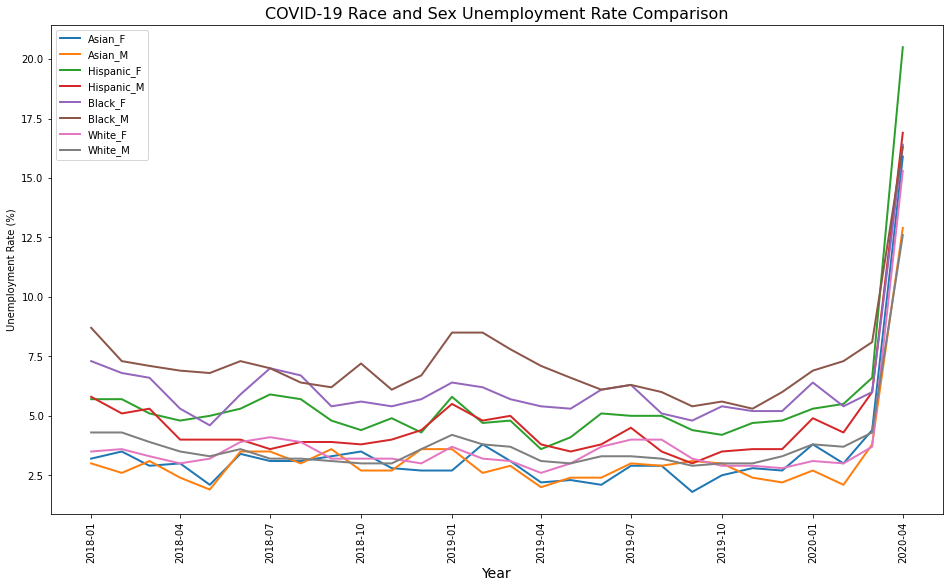

In [0]:
all_combos = [Asian_F, Asian_M, Hispanic_F, Hispanic_M, Black_F, Black_M, White_F, White_M]

fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

for MUR0 in all_combos:
  start_time = MUR0.loc[MUR0.Months == np.datetime64('2018-01-01')].index[0]
  years_of_interest = 8

  # sets the time frame of the plot
  time_frame = years_of_interest*12
  end_time = (start_time + time_frame)
  if end_time > MUR0.shape[0]:
    end_time = MUR0.shape[0]
  else:
    end_time = (start_time + time_frame)

  plt.plot(MUR0.iloc[start_time:end_time,0], MUR0.iloc[start_time:end_time,1], linewidth = '2', label = f'{MUR0.name}') # dont plot the Nan values at the end of 2020 which data doesnt exist for yet.

plt.legend()
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Unemployment Rate (%)')
plt.title('COVID-19 Race and Sex Unemployment Rate Comparison', fontsize = 16)

plt.show()

Its still a bit early to tell about this... All populations have spiked substancially though it is hard to tell if one population was more affected than another so we will likely have to rely on historial events to compare the effects of unemployment on differnent populations. 

# Unemployment by numbers - to Calculate Fractions

In [0]:
# Import data
root = '/content/drive/My Drive/STEM Fellowship - Undergrad BDC 2020/Datasets/Num Unemployed for Sex_Race Fractions/'
Asian_F_raw_num = pd.read_csv(root + 'Asian Women.csv')
Asian_M_raw_num = pd.read_csv(root + 'Asian Men.csv')
Black_F_raw_num = pd.read_csv(root + 'Black Women.csv')
Black_M_raw_num = pd.read_csv(root + 'Black Men.csv')
White_F_raw_num = pd.read_csv(root + 'White Women.csv')
White_M_raw_num = pd.read_csv(root + 'White Men.csv')
Total_raw_num = pd.read_csv(root + 'Total Unemployment.csv')

In [5]:
# some functions since we wnat to do the same thing for each of the data sets and they are quite similar

# function to change the data frame to two columns (month and percent) where the date-times are in order
# also removes nan values and the header information and converts the dates to date-time
def organize_data(some_raw_data, name):
  # create a df and two lists
  temporary = pd.DataFrame()
  time_axis = []
  temp_1_col = []

  #remove the information at the top of the data set and rename the columns and index
  temporary = some_raw_data.iloc[13:,:]
  temporary = temporary.rename(columns=some_raw_data.iloc[12,:])
  temporary = temporary.set_index('Year')

  #create a list of all the year/month combos in order rather than using them as a grid
  for i in range(int(temporary.index[0]), int(temporary.index[-1]) + 1, 1):
    for j in range(1,13):
      time_axis.append(f'{i}-{j}-01')

  #convert the list to date time format
  time_axis = pd.to_datetime(time_axis) 

  #change the df from a matrix to a single column
  for i in range(0,temporary.shape[0],1):
    for j in range(0,temporary.shape[1] - 1,1):
        temp_1_col.append(temporary.iat[i,j])

  #various other tweaks
  temp = pd.DataFrame(data = temp_1_col, index = time_axis) #save the single column data as a new data frame
  temp.columns = [name+'_Number'] # name the column 'Number' (in thousands)
  temp['Months'] = temp.index #create a column called 'Months' based on the index of the data frame
  #temp.index = np.arange(0, temporary.shape[0]*12) #reset the indexes to indicate the row number within the df
  temp = temp.dropna(0) #drop any rows with nan (such as later in 2020 which data does not exist for at this time)
  col = temp.pop('Months') #move the months column from the right side of the df to the very left
  temp.insert(0, col.name, col) 
  temp.iloc[:,-1] = temp.iloc[:,-1].astype('float') #save the data in the 'Number' column as float (it was previously string)
  temp.index = np.arange(0, temp.shape[0])

  # ALSO GET YEARLY AVERAGES
  temp_avg = pd.DataFrame(data = some_raw_data.iloc[13:,12])
  return temp, temp_avg

Asian_F_num, AF_avg_num = organize_data(Asian_F_raw_num, 'Asian_F')
Asian_F_num.name = 'Asian_F_num'
Asian_M_num, AM_avg_num = organize_data(Asian_M_raw_num, 'Asian_M')
Asian_M_num.name = 'Asian_M_num'
Black_F_num, BF_avg_num = organize_data(Black_F_raw_num, 'Black_F')
Black_F_num.name = 'Black_F_num'
Black_M_num, BM_avg_num = organize_data(Black_M_raw_num, 'Black_M')
Black_M_num.name = 'Black_M_num'
White_F_num, WF_avg_num = organize_data(White_F_raw_num, 'White_F')
White_F_num.name = 'White_F_num'
White_M_num, WM_avg_num = organize_data(White_M_raw_num, 'White_M')
White_M_num.name = 'White_M_num'
#Tot_num, Tot_avg_num = organize_data(Total_raw_num)
#Tot_num.name = 'Total_num'

print(Asian_F_num, AF_avg_num, "\n", Asian_F_num.name)


        Months  Asian_F_Number
0   2000-01-01           123.0
1   2000-02-01            95.0
2   2000-03-01           103.0
3   2000-04-01            82.0
4   2000-05-01            89.0
..         ...             ...
239 2019-12-01           132.0
240 2020-01-01           181.0
241 2020-02-01           148.0
242 2020-03-01           218.0
243 2020-04-01           742.0

[244 rows x 2 columns]    Unnamed: 12
13          81
14         176
15         175
16         164
17         128
18          99
19          75
20         135
21         149
22         254
23         233
24         247
25         287
26         146
27         150
28         165
29         133
30          99
31         133
32         132
33         NaN 
 Asian_F_num


In [6]:
# redefine function for total numbers
def organize_data(some_raw_data,name):
  # create a df and two lists
  temporary = pd.DataFrame()
  time_axis = []
  temp_1_col = []

  #remove the information at the top of the data set and rename the columns and index
  temporary = some_raw_data.iloc[11:,:]
  temporary = temporary.rename(columns=some_raw_data.iloc[10,:])
  temporary = temporary.set_index('Year')

  #create a list of all the year/month combos in order rather than using them as a grid
  for i in range(int(temporary.index[0]), int(temporary.index[-1]) + 1, 1):
    for j in range(1,13):
      time_axis.append(f'{i}-{j}-01')

  #convert the list to date time format
  time_axis = pd.to_datetime(time_axis) 

  #change the df from a matrix to a single column
  for i in range(0,temporary.shape[0],1):
    for j in range(0,temporary.shape[1] - 1,1):
        temp_1_col.append(temporary.iat[i,j])

  #various other tweaks
  temp = pd.DataFrame(data = temp_1_col, index = time_axis) #save the single column data as a new data frame
  temp.columns = [name+'_Number'] # name the column 'Number' (in thousands)
  temp['Months'] = temp.index #create a column called 'Months' based on the index of the data frame
  #temp.index = np.arange(0, temporary.shape[0]*12) #reset the indexes to indicate the row number within the df
  temp = temp.dropna(0) #drop any rows with nan (such as later in 2020 which data does not exist for at this time)
  col = temp.pop('Months') #move the months column from the right side of the df to the very left
  temp.insert(0, col.name, col) 
  temp.iloc[:,-1] = temp.iloc[:,-1].astype('float') #save the data in the 'Percent' column as float (it was previously string)
  temp.index = np.arange(0, temp.shape[0])

  # ALSO GET YEARLY AVERAGES
  temp_avg = pd.DataFrame(data = some_raw_data.iloc[13:,12])
  return temp, temp_avg

Tot_num, Tot_avg_num = organize_data(Total_raw_num,'Total')
Tot_num.name = 'Total_num'

print(Tot_num, Tot_avg_num, "\n", Tot_num.name)

        Months  Total_Number
0   1948-01-01        2351.0
1   1948-02-01        2807.0
2   1948-03-01        2646.0
3   1948-04-01        2407.0
4   1948-05-01        2014.0
..         ...           ...
863 2019-12-01        5503.0
864 2020-01-01        6504.0
865 2020-02-01        6218.0
866 2020-03-01        7370.0
867 2020-04-01       22504.0

[868 rows x 2 columns]    Unnamed: 12
13        3690
14        2409
15        1796
16        1545
17        2634
..         ...
80        7170
81        6278
82        6029
83        5503
84         NaN

[72 rows x 1 columns] 
 Total_num


In [7]:
# Join tables
def join_tables(dfs):
  dfm = dfs[-1]

  for df in dfs[0:-1]:
    dfm = pd.merge(left=dfm, right=df, left_on='Months', right_on='Months')

  return dfm

def cal_fracs(dfm):

  for i in range(2,8):
    dfm[dfm.iloc[:,i].name+'frac'] = dfm.iloc[:,i]/dfm['Total_Number']

dfs = [Asian_F_num, Asian_M_num, Black_F_num, Black_M_num, White_F_num, White_M_num, Tot_num]
merged = join_tables(dfs)

cal_fracs(merged)

merged.head()


Months  Total_Number  ...  White_F_Numberfrac  White_M_Numberfrac
0 2000-01-01        6316.0  ...            0.320456            0.405795
1 2000-02-01        6284.0  ...            0.306652            0.422661
2 2000-03-01        6069.0  ...            0.336629            0.397759
3 2000-04-01        5212.0  ...            0.336915            0.400806
4 2000-05-01        5460.0  ...            0.348352            0.360806

[5 rows x 14 columns]

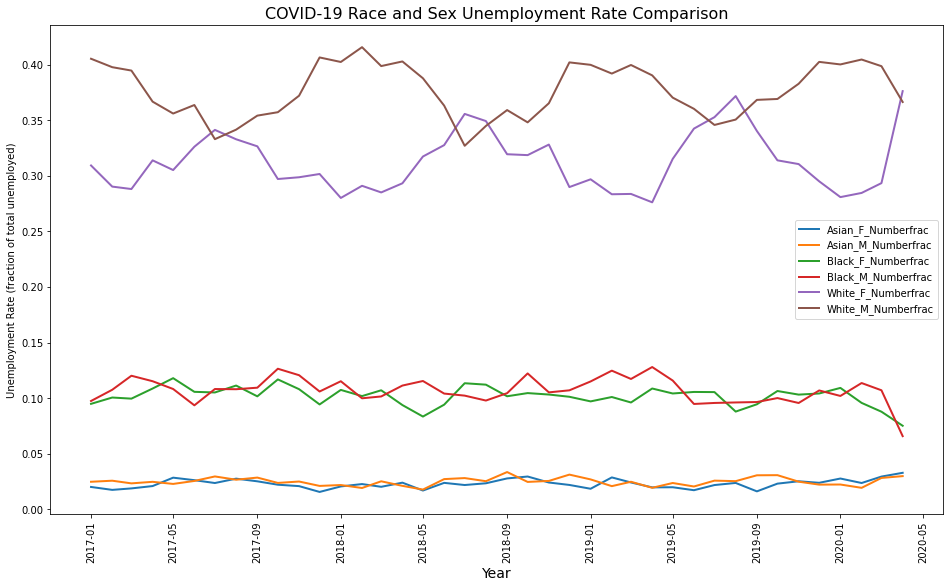

In [8]:
# plot for COVID
fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

for i in range (8,14):
  start_time = merged.loc[merged.Months == np.datetime64('2017-01-01')].index[0]
  years_of_interest = 8

  # sets the time frame of the plot
  time_frame = years_of_interest*12
  end_time = (start_time + time_frame)
  if end_time > merged.shape[0]:
    end_time = merged.shape[0]
  else:
    end_time = (start_time + time_frame)
  plt.plot(merged.iloc[start_time:end_time,0], merged.iloc[start_time:end_time,i], linewidth = '2', label = f'{merged.iloc[:,i].name}')

plt.legend()
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Unemployment Rate (fraction of total unemployed)')
plt.title('COVID-19 Race and Sex Unemployment Rate Comparison', fontsize = 16)
plt.show()

# the fluctuations in the period match with the seasonal fluctuations

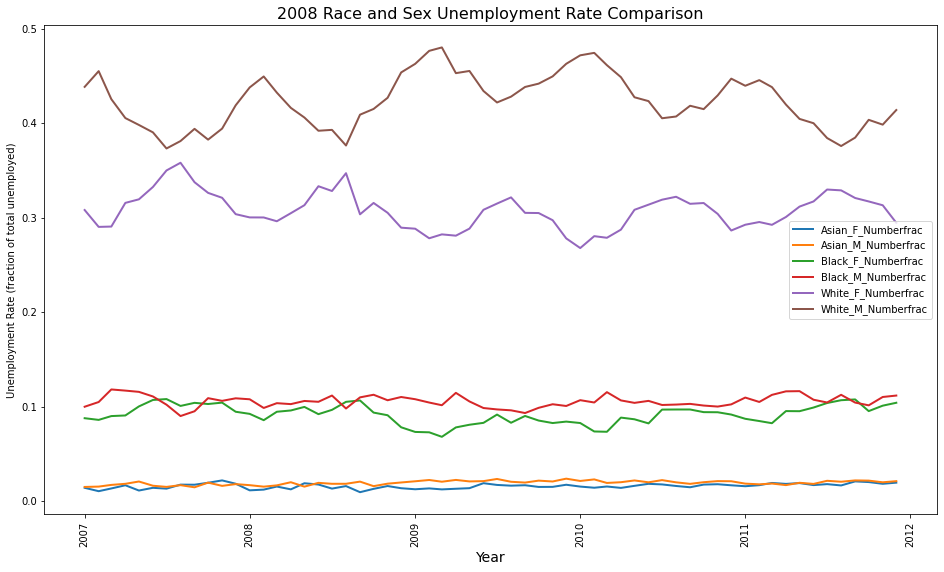

In [10]:
# plot for 2008
fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

for i in range (8,14):
  start_time = merged.loc[merged.Months == np.datetime64('2007-01-01')].index[0]
  years_of_interest = 5

  # sets the time frame of the plot
  time_frame = years_of_interest*12
  end_time = (start_time + time_frame)
  if end_time > merged.shape[0]:
    end_time = merged.shape[0]
  else:
    end_time = (start_time + time_frame)
  plt.plot(merged.iloc[start_time:end_time,0], merged.iloc[start_time:end_time,i], linewidth = '2', label = f'{merged.iloc[:,i].name}')

plt.legend()
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Unemployment Rate (fraction of total unemployed)')
plt.title('2008 Race and Sex Unemployment Rate Comparison', fontsize = 16)
plt.show()

# Population Density By State Versus Cases by State
<font color='red'>**This collapsed section was completed in notebook 1 and is not functional here</font> 

In [0]:
import pandas as pd

df_US = pd.DataFrame() # create an emptry data frame 

for month in ['01','02','03','04','05','06','07','08','09','10','11','12']: # I didn't know how else to get the numbers in the right format for use in the url
  for day in ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19',
              '20','21','22','23','24','25','26','27','28','29','30','31']:
    try: # using 'try' because i didnt want to deal with dates that are non-existent
      # the location of the github repository 
      url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/{month}-{day}-2020.csv'
      # append new data from a different date onto the bottom of the data frame
      df_US = df_US.append(pd.read_csv(url, error_bad_lines=False))
    except: # if the date does not exist then skip it
      pass

In [0]:
df_US # show the data frame currently

Province_State Country_Region  ... Testing_Rate  Hospitalization_Rate
0         Alabama             US  ...   460.300152             12.264945
1          Alaska             US  ...  1344.711576             11.397059
2         Arizona             US  ...   578.522286                   NaN
3        Arkansas             US  ...   761.753354             10.156250
4      California             US  ...   485.423868             22.961176
..            ...            ...  ...          ...                   ...
53       Virginia             US  ...  2085.567380             18.540737
54     Washington             US  ...  3518.512998                   NaN
55  West Virginia             US  ...  3958.157450                   NaN
56      Wisconsin             US  ...  2410.366524             16.919127
57        Wyoming             US  ...  2768.337080              9.497207

[2152 rows x 18 columns]

In [0]:
df_US.index = pd.to_datetime(df_US.Last_Update)
df_US

Province_State  ... Hospitalization_Rate
Last_Update                         ...                     
2020-04-12 23:18:15        Alabama  ...            12.264945
2020-04-12 23:18:15         Alaska  ...            11.397059
2020-04-12 23:18:15        Arizona  ...                  NaN
2020-04-12 23:18:15       Arkansas  ...            10.156250
2020-04-12 23:18:15     California  ...            22.961176
...                            ...  ...                  ...
2020-05-16 02:32:24       Virginia  ...            18.540737
2020-05-16 02:32:24     Washington  ...                  NaN
2020-05-16 02:32:24  West Virginia  ...                  NaN
2020-05-16 02:32:24      Wisconsin  ...            16.919127
2020-05-16 02:32:24        Wyoming  ...             9.497207

[2152 rows x 18 columns]

In [0]:
# only get certain columns cuz the others are not needed for now
df_US = df_US[['Province_State','Confirmed','Deaths','Recovered','Active','People_Tested']]

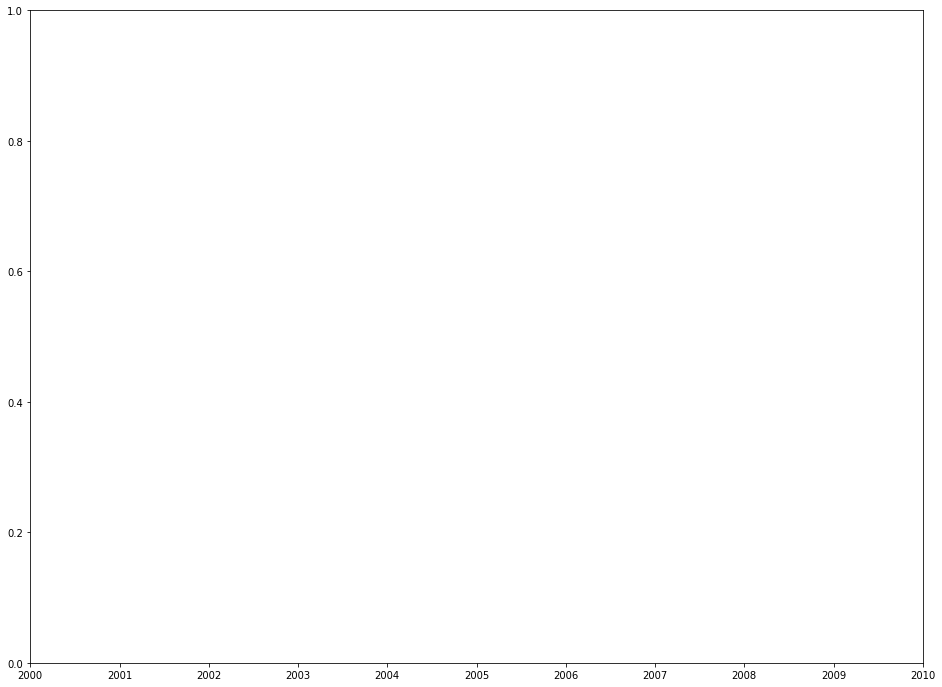

In [0]:
import matplotlib.pyplot as plt

# a more generalized version trying to use all the states instead of just four:
general_list = df_US.Province_State.unique()
#print(general_list) # i thought this data was only for the US but apparently not lol
df_US3 = df_US[df_US.Province_State.isin(general_list)]

#Create plot
fig,ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')  #Used for dark mode

for state in general_list:
  try:
    to_plot = df_US3.groupby(['Province_State']).get_group(f'{state}')

    plt.plot(df_US.index, to_plot['Confirmed'], label = f'{state} Confirmed') # 's' was the variable for the range of dates
    plt.title('Lines Test Plot - All States Included in the Data Set')

    plt.yscale('log')
    plt.xlabel('April 12, 2020 - May 16, 2020')
    plt.ylabel('Stats')
    plt.legend(loc='upper left')
  except:
    pass

plt.show()

# US Unemployment for 6 select States, Counties, or Cities. Full list of stats broken down by each state, country, city, macro/micro regions, census regions, etc. see US bureau of labour statistics.

dont need to run any cells from above to run this section

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Alabama Statewide.csv to Alabama Statewide.csv
Saving Bronx County NY.csv to Bronx County NY.csv
Saving Los Angeles City CA.csv to Los Angeles City CA.csv
Saving Los Angeles County CA.csv to Los Angeles County CA.csv
Saving Madison County NY.csv to Madison County NY.csv
Saving New York County NY.csv to New York County NY.csv
Saving Odessa City TX.csv to Odessa City TX.csv


In [0]:
Bronx_raw = pd.read_csv('Bronx County NY.csv')
Alabama_raw = pd.read_csv('Alabama Statewide.csv')
LA_raw = pd.read_csv('Los Angeles City CA.csv')
Madison_raw = pd.read_csv('Madison County NY.csv')
NY_county_raw = pd.read_csv('New York County NY.csv')
Odessa_raw = pd.read_csv('Odessa City TX.csv')

In [0]:
def data_clean(region):
  x = region.loc[region.iloc[:,0] == 'Year']
  cleaned_region = region.iloc[x.index[0]+1:,:]
  cleaned_region.columns = region.iloc[x.index[0],:]
  cleaned_region = cleaned_region[['Year', 'Period', 'unemployment rate']]
  cleaned_region.index = np.arange(0,cleaned_region.shape[0])
  cleaned_region.Year = cleaned_region.Year + '-' + cleaned_region.Period
  cleaned_region.Year = pd.to_datetime(cleaned_region.Year)
  cleaned_region = cleaned_region[['Year', 'unemployment rate']]
  cleaned_region.columns = ['Year','Unemployment_Rate']
  cleaned_region.Unemployment_Rate= cleaned_region.Unemployment_Rate.astype('float')

  # also add a column for a simply moving average to smooth the data over a period of a year
  cleaned_region['Averaged'] = cleaned_region.loc[:,['Unemployment_Rate']].rolling(window=14).mean()
  return cleaned_region

Bronx = data_clean(Bronx_raw)
Bronx.name = 'Bronx County NY'
Alabama = data_clean(Alabama_raw)
Alabama.name = 'Alabama State'
LA = data_clean(LA_raw)
LA.name = 'LA City CA'
Madison = data_clean(Madison_raw)
Madison.name = 'Madison County NY'
NY_county = data_clean(NY_county_raw)
NY_county.name = 'New York County NY'
Odessa = data_clean(Odessa_raw)
Odessa.name  = 'Odessa City TX'

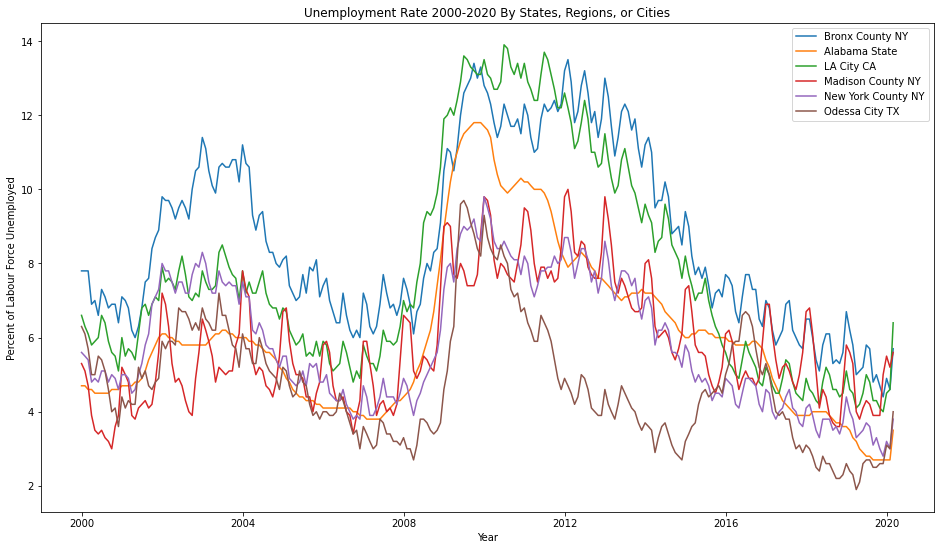

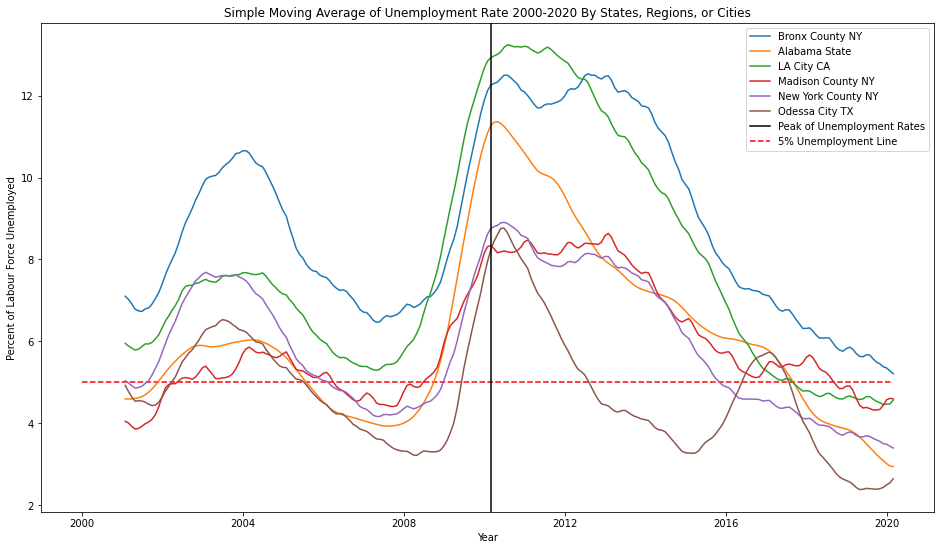

In [0]:
regions_list = [Bronx, Alabama, LA, Madison, NY_county, Odessa]

fig,ax = plt.subplots()
fig.set_size_inches(16,9)
fig.set_facecolor('w')  #Used for dark mode

# Plot the raw data 
for locale in regions_list:
  plt.plot(locale.Year, locale.Unemployment_Rate, label = f'{locale.name}')

plt.legend()
plt.title('Unemployment Rate 2000-2020 By States, Regions, or Cities')
plt.xlabel('Year')
plt.ylabel('Percent of Labour Force Unemployed')
plt.show()

fig,ax = plt.subplots()
fig.set_size_inches(16,9)
fig.set_facecolor('w')  #Used for dark mode

# Plot averaged values to smooth out the line
for locale in regions_list:
  plt.plot(locale.Year, locale.Averaged, label = f'{locale.name}')

plt.hlines(5, np.datetime64('2000-01-01'),np.datetime64('2020-03-01'), label = '5% Unemployment Line', color = 'r', linestyles='--')
plt.axvline(np.datetime64('2010-03-01'), 0,1, color = 'k', label = 'Peak of Unemployment Rates')
plt.title('Simple Moving Average of Unemployment Rate 2000-2020 By States, Regions, or Cities')
plt.xlabel('Year')
plt.ylabel('Percent of Labour Force Unemployed')
plt.legend()

plt.show()

From this we want to see if there is any difference in how long different regions take to recovery from an economic crisis such as the 2008 recession. We want to see how many years it takes after the peak of the recession to return to under 5% unemployment (a standard indicator of a generally healthy economic system). We would also want to see why each region takes longer if at all. We must also consider the fact that some regions start much higher than others and seom like the Bronx or LA city do not drop below 5% anywhere before the start of the recession... the peak of the recession is somewhat delayed in the smooth graph since we are taking the average over the span of a year rather than looking at monthly data.

In [0]:
stufff can you see this?
yes can you see this
ah I see

# Unemployment Versus Cases By State (With State Size)

In [0]:
import pandas as pd

df_US = pd.DataFrame() # create an emptry data frame 

for month in ['01','02','03','04','05','06','07','08','09','10','11','12']: # I didn't know how else to get the numbers in the right format for use in the url
  for day in ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19',
              '20','21','22','23','24','25','26','27','28','29','30','31']:
    try: # using 'try' because i didnt want to deal with dates that are non-existent
      # the location of the github repository 
      url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/{month}-{day}-2020.csv'
      # append new data from a different date onto the bottom of the data frame
      df_US = df_US.append(pd.read_csv(url, error_bad_lines=False))
    except: # if the date does not exist then skip it
      pass

In [0]:
import matplotlib.pyplot as plt
import matplotlib.markers as mkr
from google.colab import drive
import numpy as np

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = '/content/drive/My Drive/STEM Fellowship - Undergrad BDC 2020/Datasets/US Data/'
pop_raw = pd.read_csv(path+'Population By State.csv')
UR = pd.read_csv(path+'Unemployment by State.csv').iloc[1:,:-1]
UR = UR.set_index('State')
UR['UGH'] = UR.index
UR = UR.sort_index(axis = 0)

In [0]:
df = df_US[['Province_State', 'Confirmed']]
df = df.set_index('Province_State')
df['UGH'] = df.index
#df

In [0]:
pop = pd.DataFrame(pop_raw.iloc[2:, :])
pop.columns = ['UGHHHH', 'Population']
pop.index = pop.UGHHHH
pop.Population = pd.to_numeric(pop.Population.str.replace(",", ""))
pop = pop.sort_index(axis=0)
pop.index = np.arange(0, pop.shape[0])
for i in range(0,pop.shape[0]):
  pop.UGHHHH[i] = str(pop.UGHHHH[i][1:])

pop.UGHHHH[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


'Alabama'

In [0]:
sure = pd.merge(UR,df, how='left', on='UGH')
#sure = pd.merge(sure, df, how='left', on='UGH')
master = sure.groupby(sure.UGH).max()
master.columns = ['Unemployment_Rate', 'Confirmed_Cases']
master.Unemployment_Rate = master.Unemployment_Rate.astype('float')
master.Confirmed_Cases = master.Confirmed_Cases.astype('float')
master['UGHHHH'] = master.index
col = master.pop('UGHHHH')
master.insert(0, col.name, col)
masterzzz = pd.merge(master, pop, how='left', on ='UGHHHH')
masterzzz.Population
masterzzz

UGHHHH  Unemployment_Rate  Confirmed_Cases  Population
0                Alabama               12.9          16530.0     4903185
1                 Alaska               12.9            424.0      731545
2                Arizona               12.6          17877.0     7278717
3               Arkansas               10.2           6538.0     3017825
4             California               15.5         103813.0    39512223
5               Colorado               11.3          25107.0     5758736
6            Connecticut                7.9          41559.0     3565287
7               Delaware               14.3           9171.0      973764
8   District of Columbia               11.1           8492.0      705749
9                Florida               12.9          53285.0    21477737
10               Georgia               11.9          45266.0    10617423
11                Hawaii               22.3            647.0     1415872
12                 Idaho               11.5           2770.0     1787065
13              Illinois               16.4         115833.0    12671821
14               Indiana               16.9          33068.0     6732219
15                  Iowa               10.2          18586.0     3155070
16                Kansas               11.2           9371.0     2913314
17              Kentucky               15.4           9185.0     4467673
18             Louisiana               14.5          38802.0     4648794
19                 Maine               10.6           2189.0     1344212
20              Maryland                9.9          49709.0     6045680
21         Massachusetts               15.1          94895.0     6949503
22              Michigan               22.7          56014.0     9986857
23             Minnesota                8.1          22947.0     5639632
24           Mississippi               15.4          14372.0     2976149
25              Missouri                9.7          12981.0     6137428
26               Montana               11.3            485.0     1068778
27              Nebraska                8.3          13249.0     1934408
28                Nevada               28.2           8248.0     3080156
29         New Hampshire               16.3           4389.0     1359711
30            New Jersey               15.3         157185.0     8882190
31            New Mexico               11.3           7364.0     2096829
32              New York               14.5         366733.0    19453561
33        North Carolina               12.2          25800.0    10488084
34          North Dakota                8.5           2481.0      762062
35                  Ohio               16.8          33915.0    11689100
36              Oklahoma               13.7           6273.0     3956971
37                Oregon               14.2           4086.0     4217737
38          Pennsylvania               15.1          74220.0    12801989
39          Rhode Island               17.0          14494.0     1059361
40        South Carolina               12.1          10788.0     5148714
41          South Dakota               10.2           4793.0      884659
42             Tennessee               14.7          21679.0     6833174
43                 Texas               12.8          60395.0    28995881
44                  Utah                9.7           8921.0     3205958
45               Vermont               15.6            974.0      623989
46              Virginia               10.6          41401.0     8535519
47            Washington               15.4          20764.0     7614893
48         West Virginia               15.2           1935.0     1792147
49             Wisconsin               14.1          16974.0     5822434
50               Wyoming                9.2            876.0      578759

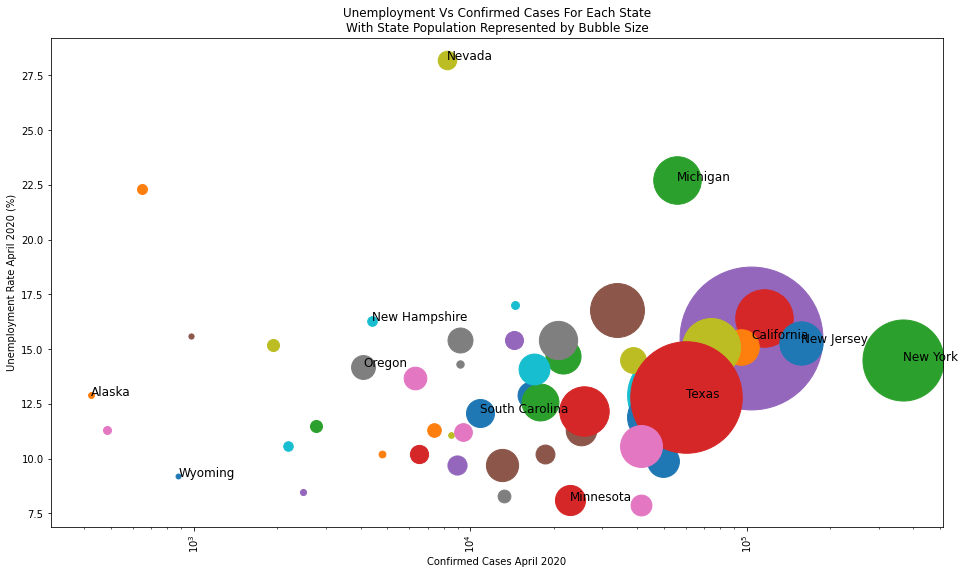

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32     True
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
Name: UGHHHH, dtype: bool

In [0]:
fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_facecolor('white')
ax.set_facecolor('white')
fig.set_size_inches(16,9)
#mkr.MarkerStyle(marker='o', fillstyle='full')

for d in range(0, 100):
  try:
    plt.scatter(masterzzz.Confirmed_Cases[d], masterzzz.Unemployment_Rate[d], s= (masterzzz.Population[d]**1.6)/80000**1.6, marker='o')

  except: pass



for i, txt in enumerate(master.index):
  if ((masterzzz.UGHHHH[i] == 'New York') is True) or ((masterzzz.UGHHHH[i] == 'New Jersey')is True) or ((masterzzz.UGHHHH[i] == 'California')is True)or ((masterzzz.UGHHHH[i] == 'Michigan')is True)or ((masterzzz.UGHHHH[i] == 'Nevada')is True)or ((masterzzz.UGHHHH[i] == 'Alaska')is True)or ((masterzzz.UGHHHH[i] == 'New Jersey')is True)or ((masterzzz.UGHHHH[i] == 'Texas')is True)or ((masterzzz.UGHHHH[i] == 'New Hampshire')is True)or ((masterzzz.UGHHHH[i] == 'Oregon')is True)or ((masterzzz.UGHHHH[i] == 'Minnesota')is True)or ((masterzzz.UGHHHH[i] == 'South Carolina')is True)or ((masterzzz.UGHHHH[i] == 'Wyoming')is True):
    ax.annotate(txt, (masterzzz.Confirmed_Cases[i], masterzzz.Unemployment_Rate[i]), color = 'k', fontsize = 12)
  else: pass

plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Confirmed Cases April 2020')
plt.ylabel('Unemployment Rate April 2020 (%)')
plt.title('Unemployment Vs Confirmed Cases For Each State\nWith State Population Represented by Bubble Size')
#adjust_text(txt)
plt.show()

# plt.hist(masterzzz.Unemployment_Rate,100)
# # plt.show()

masterzzz.UGHHHH == 'New York'

from this we can see that the unemployment rates in states are not really correlated to the number of confirmed cases. most states are seeing aproximately 13% unemployment rates no matter how many cases they have. for example (since we are on a log plot on the x axis) kentucky, utah, and oregon all have ten times fewer cases than california, illinois, or new jersey and yet they have very similar levels of unemployment rates. this seems to indicate (at least using unemployment as an economic indicator) that a lot of the states are seeing similar levels of economic decline despite not having as many COVID cases. 

In [0]:
!pip install adjustText
from adjustText import adjust_text

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7100 sha256=10d74465e96503dc4f50be32d03276eaf571c1679caa4647f6f257c33b51337a
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


# Population Density Versus Cases By State (With State Size)

run the previous section first before running this one. actually you dont need to i dont think 

In [0]:
# Land area for each state from here: https://statesymbolsusa.org/symbol-official-item/national-us/uncategorized/states-size
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [0]:
# # open files from computer
# from google.colab import files
# uploaded = files.upload()

In [0]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')
# !ls /content/drive/

# !ls /content/drive/My\ Drive/STEM\ Fellowship\ -\ Undergrad\ BDC\ 2020/Datasets/Population\ Density\ \(for\ #4\)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# read files
root = '/content/drive/My Drive/STEM Fellowship - Undergrad BDC 2020/Datasets/Population Density (for #4)/'
pops = pd.read_csv(root + 'Population Estimates by State.csv')
area = pd.read_csv(root + 'State_Land_Area.csv')
# pop
# area

In [0]:
# clean the data
# remove random \t from end of some of the state names
for i in range(area.shape[0]):
  x = area.State[i]

  if x[-1] == '\t':
    area.State[i] = x[:-1]
  else:
    pass 

# formatting the population data
pops.columns = ['State', 'Population']
pop1 = pops.iloc[1:51, :]
pop1['Population'] = pop1['Population'].str.replace(',', '')
pop1.Population = pd.to_numeric(pop1.Population)
pop1 = pop1.set_index('State')

# formatting the land area data
area1 = area.set_index('State')
#area1

result = pd.concat([pop1, area1], axis=1)
df = result.dropna()
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Population   Square_Miles
Alabama          4903185.0        50744.0
Alaska            731545.0       571951.0
Arizona          7278717.0       113635.0
Arkansas         3017804.0        52068.0
California      39512223.0       155959.0
Colorado         5758736.0       103718.0
Connecticut      3565287.0         4845.0
Delaware          973764.0         1954.0
Florida         21477737.0        53927.0
Georgia         10617423.0        57906.0
Hawaii           1415872.0         6423.0
Idaho            1787065.0        82747.0
Illinois        12671821.0        55584.0
Indiana          6732219.0        35867.0
Iowa             3155070.0        55869.0
Kansas           2913314.0        81815.0
Kentucky         4467673.0        39728.0
Louisiana        4648794.0        43562.0
Maine            1344212.0        30862.0
Maryland         6045680.0         9774.0
Massachusetts    6892503.0         7840.0
Michigan         9986857.0        56804.0
Minnesota        5639632.0        79610.0
Mississippi      2976149.0        46907.0
Missouri         6137428.0        68886.0
Montana          1068778.0       145552.0
Nebraska         1934408.0        76872.0
Nevada           3080156.0       109826.0
New Hampshire    1359711.0         8968.0
New Jersey       8882190.0         7417.0
New Mexico       2096829.0       121356.0
New York        19453561.0        47214.0
North Carolina  10488084.0        48711.0
North Dakota      762062.0        68976.0
Ohio            11689100.0        40948.0
Oklahoma         3956971.0        68667.0
Oregon           4217737.0        95997.0
Pennsylvania    12801989.0        44817.0
Rhode Island     1059361.0         1045.0
South Carolina   5148714.0        30110.0
South Dakota      884659.0        75885.0
Tennessee        6829174.0        41217.0
Texas           28995881.0       261797.0
Utah             3205958.0        82144.0
Vermont           623989.0         9250.0
Virginia         8535519.0        39594.0
Washington       7614893.0        66544.0
West Virginia    1792147.0        24078.0
Wisconsin        5822434.0        54310.0

In [0]:
# calculate the population density since we were only given population and land area for each state
# now create a third column in the data frame with te population density
pop_den  = []

for i in range(0,df.shape[0],1):
  pop_den.append(df.iat[i,0]/df.iat[i,1])

pop_den1 = pd.DataFrame(pop_den)
pop_den1 = pop_den1.set_index(df.index)
pop_den1.columns = ['Pop_Per_Sq_Mile']

In [0]:
# clean the US confirmed cases data
current_stats = df_US.groupby(['Last_Update']).get_group(df_US.iat[-1,2])
current_stats = current_stats.set_index('Province_State')
current_confirmed = current_stats[['Confirmed']]
current_confirmed

Confirmed
Province_State                     
Alabama                       16530
Alaska                          424
American Samoa                    0
Arizona                       17877
Arkansas                       6538
California                   103813
Colorado                      25107
Connecticut                   41559
Delaware                       9171
Diamond Princess                 49
District of Columbia           8492
Florida                       53285
Georgia                       45266
Grand Princess                  103
Guam                            171
Hawaii                          647
Idaho                          2770
Illinois                     115833
Indiana                       33068
Iowa                          18586
Kansas                         9371
Kentucky                       9185
Louisiana                     38802
Maine                          2189
Maryland                      49709
Massachusetts                 94895
Michigan                      56014
Minnesota                     22947
Mississippi                   14372
Missouri                      12981
Montana                         485
Nebraska                      13249
Nevada                         8248
New Hampshire                  4389
New Jersey                   157185
New Mexico                     7364
New York                     366733
North Carolina                25800
North Dakota                   2481
Northern Mariana Islands         22
Ohio                          33915
Oklahoma                       6273
Oregon                         4086
Pennsylvania                  74220
Puerto Rico                    3486
Rhode Island                  14494
South Carolina                10788
South Dakota                   4793
Tennessee                     21679
Texas                         60395
Utah                           8921
Vermont                         974
Virgin Islands                   69
Virginia                      41401
Washington                    20764
West Virginia                  1935
Wisconsin                     16974
Wyoming                         876

In [0]:
# join all the data into a single data frame
df_final = pd.concat([current_confirmed, df, pop_den1], axis=1)
df_final = df_final.dropna()
df_final

Confirmed  Population   Square_Miles  Pop_Per_Sq_Mile
Alabama             16530   4903185.0        50744.0        96.625907
Alaska                424    731545.0       571951.0         1.279034
Arizona             17877   7278717.0       113635.0        64.053478
Arkansas             6538   3017804.0        52068.0        57.958900
California         103813  39512223.0       155959.0       253.350066
Colorado            25107   5758736.0       103718.0        55.523014
Connecticut         41559   3565287.0         4845.0       735.869350
Delaware             9171    973764.0         1954.0       498.343910
Florida             53285  21477737.0        53927.0       398.274278
Georgia             45266  10617423.0        57906.0       183.356181
Hawaii                647   1415872.0         6423.0       220.437802
Idaho                2770   1787065.0        82747.0        21.596735
Illinois           115833  12671821.0        55584.0       227.976054
Indiana             33068   6732219.0        35867.0       187.699529
Iowa                18586   3155070.0        55869.0        56.472641
Kansas               9371   2913314.0        81815.0        35.608556
Kentucky             9185   4467673.0        39728.0       112.456529
Louisiana           38802   4648794.0        43562.0       106.716726
Maine                2189   1344212.0        30862.0        43.555570
Maryland            49709   6045680.0         9774.0       618.547166
Massachusetts       94895   6892503.0         7840.0       879.145791
Michigan            56014   9986857.0        56804.0       175.812566
Minnesota           22947   5639632.0        79610.0        70.840749
Mississippi         14372   2976149.0        46907.0        63.447865
Missouri            12981   6137428.0        68886.0        89.095433
Montana               485   1068778.0       145552.0         7.342929
Nebraska            13249   1934408.0        76872.0        25.164013
Nevada               8248   3080156.0       109826.0        28.045782
New Hampshire        4389   1359711.0         8968.0       151.618087
New Jersey         157185   8882190.0         7417.0      1197.544829
New Mexico           7364   2096829.0       121356.0        17.278330
New York           366733  19453561.0        47214.0       412.029504
North Carolina      25800  10488084.0        48711.0       215.312435
North Dakota         2481    762062.0        68976.0        11.048220
Ohio                33915  11689100.0        40948.0       285.462049
Oklahoma             6273   3956971.0        68667.0        57.625512
Oregon               4086   4217737.0        95997.0        43.936133
Pennsylvania        74220  12801989.0        44817.0       285.650289
Rhode Island        14494   1059361.0         1045.0      1013.742584
South Carolina      10788   5148714.0        30110.0       170.996812
South Dakota         4793    884659.0        75885.0        11.657890
Tennessee           21679   6829174.0        41217.0       165.688284
Texas               60395  28995881.0       261797.0       110.757117
Utah                 8921   3205958.0        82144.0        39.028511
Vermont               974    623989.0         9250.0        67.458270
Virginia            41401   8535519.0        39594.0       215.576072
Washington          20764   7614893.0        66544.0       114.433953
West Virginia        1935   1792147.0        24078.0        74.430891
Wisconsin           16974   5822434.0        54310.0       107.207402

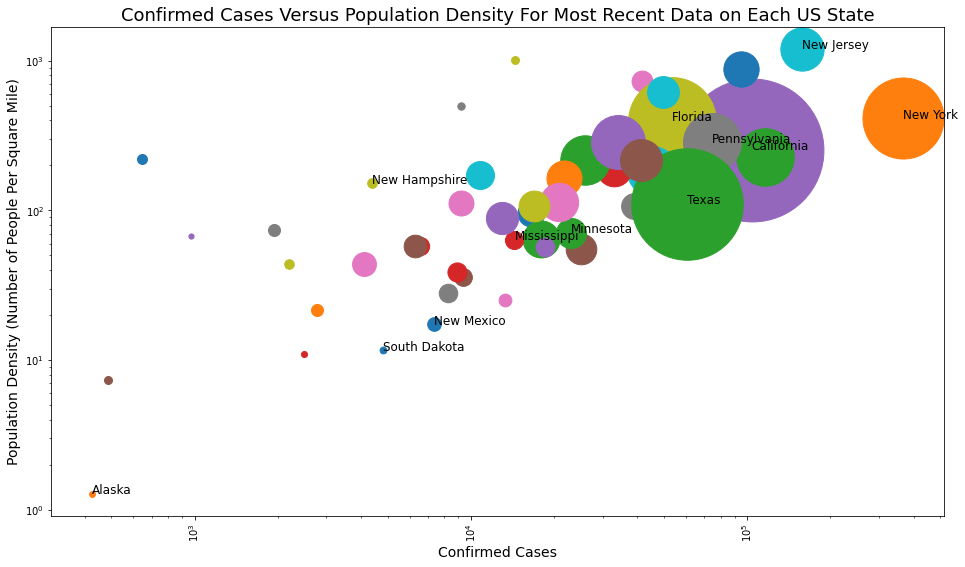

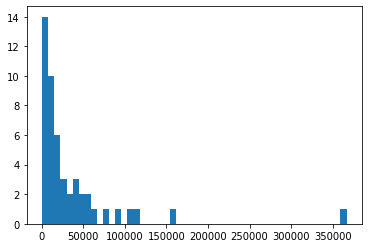

In [0]:
# plot the data where each point represents a state
fig,ax = plt.subplots()
plt.xticks(rotation = 'vertical')
fig.set_size_inches(16,9)
fig.set_facecolor('w')

for i in range(0, df_final.shape[0]):
  plt.scatter( df_final.Confirmed[i], df_final.Pop_Per_Sq_Mile[i], s = (df_final.Population[i]**1.6)/80000**1.6, marker='o')

for i, txt in enumerate(df_final.index):
  if ((df_final.index[i] == 'New York') is True) or ((masterzzz.UGHHHH[i] == 'New Jersey')is True) or ((masterzzz.UGHHHH[i] == 'California')is True)or ((masterzzz.UGHHHH[i] == 'Michigan')is True)or ((masterzzz.UGHHHH[i] == 'Nevada')is True)or ((masterzzz.UGHHHH[i] == 'Alaska')is True)or ((masterzzz.UGHHHH[i] == 'New Jersey')is True)or ((df_final.index[i] == 'Texas')is True)or ((masterzzz.UGHHHH[i] == 'New Hampshire')is True)or ((masterzzz.UGHHHH[i] == 'Oregon')is True)or ((masterzzz.UGHHHH[i] == 'Minnesota')is True)or ((masterzzz.UGHHHH[i] == 'South Carolina')is True)or ((masterzzz.UGHHHH[i] == 'Wyoming')is True)or ((df_final.index[i] == 'Massachusets')is True)or ((df_final.index[i] == 'Florida')is True):
    ax.annotate(txt, (df_final.Confirmed[i], df_final.Pop_Per_Sq_Mile[i]), color = 'k', fontsize = 12)
  else: pass

plt.xlabel('Confirmed Cases', fontsize = 14)
plt.ylabel('Population Density (Number of People Per Square Mile)', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.title('Confirmed Cases Versus Population Density For Most Recent Data on Each US State', fontsize = 18)
plt.show()

plt.hist(df_final.Confirmed, 50)
plt.show()

plt.hist(df_final.Pop_Per_Sq_Mile, 50)
plt.show()

plt.hist(df_final.Population, 50)
plt.show()

from this we can see that the number of cases seems more dependant on overall population rather than population density being the dominant factor. While new jearsy does represent a state with a high population density with relatively low overall population and high amount of confirmed cases there is hardly a trend. If we plot a log log graph we can see that generally bubble size (population of the state) increases as confirmed cases do and population density also generally increases with larger population.